Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


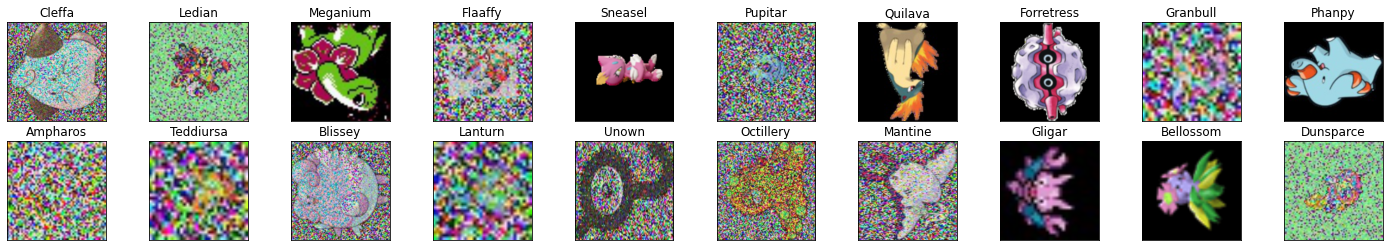

In [18]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from math import floor
import os
import torchvision.models
import time
alexnet = torchvision.models.alexnet(pretrained=True)
torch.manual_seed(103)
#102 is main

from google.colab import drive
drive.mount('/content/gdrive')
train_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Training"
valid_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Validation"
test_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Test"


data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor()])

train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms) 

hyperparameters = [20,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)


dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]))
    ax.set_title(pokemon_names[labels[idx]])

In [ ]:
def features_to_folder(loader, path):
    n = 0
    for img, label in loader:

      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      x = torch.tensor(label)
      q = x.item()

      folder_name = path + '/' + str(pokemon_names[q])
      if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n += 1

features_to_folder(train_loader, train_path)
features_to_folder(valid_loader, valid_path)

NameError: ignored

In [7]:
def graph_features(fig, classes):
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [5]:
pokemon_names = ["Aipom",
                "Ampharos",    
                "Ariados",    
                "Azumarill",    
                "Bayleef",    
                "Bellossom",    
                "Blissey",    
                "Celebi",    
                "Chikorita",    
                "Chinchou",    
                "Cleffa",    
                "Corsola",    
                "Crobat",    
                "Croconaw",    
                "Cyndaquil",    
                "Delibird",    
                "Donphan",    
                "Dunsparce",    
                "Elekid",    
                "Entei",    
                "Espeon",    
                "Feraligatr",    
                "Flaaffy",    
                "Forretress",    
                "Furret",    
                "Girafarig",    
                "Gligar",    
                "Granbull",    
                "Heracross",    
                "Hitmontop",
                "Ho-oh",    
                "Hoothoot",    
                "Hoppip",    
                "Houndoom",    
                "Houndour",    
                "Igglybuff",    
                "Jumpluff",    
                "Kingdra",    
                "Lanturn",    
                "Larvitar",    
                "Ledian",    
                "Ledyba",    
                "Lugia",    
                "Magby",    
                "Magcargo",    
                "Mantine",    
                "Mareep",    
                "Marill",   
                "Meganium",    
                "Miltank",    
                "Misdreavus",    
                "Murkrow",    
                "Natu",    
                "Noctowl",    
                "Octillery",    
                "Phanpy",    
                "Pichu",    
                "Piloswine",    
                "Pineco",    
                "Politoed",    
                "Porygon2",    
                "Pupitar",    
                "Quagsire",    
                "Quilava",    
                "Qwilfish",    
                "Raikou",    
                "Remoraid",    
                "Scizor",    
                "Sentret",    
                "Shuckle",    
                "Skarmory",    
                "Skiploom",    
                "Slowking",    
                "Slugma",    
                "Smeargle",    
                "Smoochum",    
                "Sneasel",    
                "Snubbull",    
                "Spinarak",    
                "Stantler",    
                "Steelix",    
                "Sudowoodo",    
                "Suicune",    
                "Sunflora",    
                "Sunkern",    
                "Swinub",    
                "Teddiursa",    
                "Togepi",    
                "Togetic",    
                "Totodile",    
                "Typhlosion",    
                "Tyranitar",    
                "Tyrogue",    
                "Umbreon",    
                "Unown",    
                "Ursaring",    
                "Wobbuffet",    
                "Wooper",    
                "Xatu",    
                "Yanma"]
print(len(pokemon_names))

100


In [20]:
train_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Training"
train_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
valid_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Validation"
valid_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))

hyperparameters = [1,1]

train_loader = torch.utils.data.DataLoader(train_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
valid_loader = torch.utils.data.DataLoader(valid_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)

In [21]:
use_cuda = True

In [22]:
#Base AlexNet
class Pokemon_Classifier_AlexNet(nn.Module):
    def __init__(self, name = "Pokemon_Classifier_AlexNet"):
          self.name = "Pokemon_Classifier_AlexNet"
          super(Pokemon_Classifier_AlexNet, self).__init__()
          self.conv1 = nn.Conv2d(256, 50, 2) #in_channels, out_chanels, kernel_size
          self.conv2 = nn.Conv2d(50, 10, 2) #in_channels, out_chanels, kernel_size
          self.fc1 = nn.Linear(10*4*4, 300)
          self.fc2 = nn.Linear(300, 149)

    def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(self.conv2(x))
          x = x.view(-1, 10*4*4)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [23]:
def train(model, train_dataset, valid_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=1, shuffle=True, drop_last = True)
    val_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                              num_workers=1, shuffle=True, drop_last = True)
    train_acc = np.zeros(num_epochs)
    valid_acc = np.zeros(num_epochs)
    loss_chart = np.zeros(num_epochs)
    epochs = []
    timelist = []

    # training

    n = 0

    for epoch in range(num_epochs):
        start_time = time.time()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        percentOfEpoch = 0
        for imgs, labels in iter(train_loader):
            if use_cuda == True:
              imgs = imgs.cuda()
              labels = labels.cuda()



            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            percentOfEpoch += 1
        n += 1
        epochs.append(n)
        timelist.append((time.time() - start_time))

        
        # track accuracy
        train_acc[epoch] = get_accuracy(model, train_loader)
        valid_acc[epoch] = get_accuracy(model, valid_loader)
        loss_chart[epoch] = float(loss)/batch_size
        model_path = f"model_{model.name}_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
        torch.save(model.state_dict(), model_path)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[epoch]}; Validation accuracy = {valid_acc[epoch]}"))

    epochs = np.arange(1, num_epochs + 1)

    plotting(epochs,loss_chart,train_acc, valid_acc)

    return train_acc[-1], valid_acc[-1], epochs, timelist

In [24]:
def plotting(epochs, loss_chart, train_acc, valid_acc):
    plt.title("Training Loss Curve")
    plt.plot(epochs, loss_chart, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

In [25]:
def get_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        if use_cuda == True:
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [26]:
!nvidia-smi
torch.cuda.is_available()

Thu Mar 16 21:40:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
model = Pokemon_Classifier_AlexNet()


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print("Training on Cuda! My life is a nightmare")


train(model, train_dataset_new, valid_dataset_new, batch_size = 1, learning_rate = 0.001, num_epochs=15)

Training on Cuda! My life is a nightmare
